# Сборный проект

Описание проекта:

Нам предстоит поработатьс данными интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Нам нужно отработать принцип работы с данными, чтобы сделать рекомендации для РК на следущий год.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг

### Загружаем необходимые библиотеки и датасет. Изучаем данные.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Вывод:

Данные предоставлены с пропусками и без очевидных дубликатов, некоторые типы данных стоит изменить, и создать дополнительные колонки с категориями.

## Шаг 

### Подготовка данных

[Х]Замена названия столбцов (приведите к нижнему регистру);

[Х]Преобразование данных в нужные типы.

[Х]Обработка пропусков;

[Х]Суммарные продажи во всех регионах и запись их в отдельный столбец.

In [8]:
#посмотрим на название колонок
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
# приведем название колонок к единому нижнему регистру 
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
# обработаем и заполним пропущенные значения
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
# посмотрим более детально на пропуски в колоках 'genre', 'year_of_release' и 'name'
# напишем фукцию, которая возвращает Series с пропусками в указанной колонке
def miss_data(col):
    return df[df[col].isnull()]

In [12]:
miss_data('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
miss_data('genre')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
# из видим, что строчки с пропусками их колонки с названием и колонки жанра одинаковые - смело их удаляем
df.drop(miss_data('name').index, inplace = True)

In [15]:
miss_data('year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [16]:
# есть предположение, что пропушенные года можно восстановить по другим платформам. Например: игра Madden NFL 2004
df.query("name == 'Madden NFL 2004'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [17]:
# выделяем ненулевые данные по столбцу 
not_null_values = df[df['year_of_release'].notnull()]

In [18]:
# пишем функцию для замены пропусков
def fill_year_of_release(row):
    col = 'year_of_release'
    rows = not_null_values[not_null_values['name'] == row['name']]
   
    if len(rows) > 0:
        return rows.iloc[0][col]
    
    return row[col]

In [19]:
df['year_of_release'] = df.apply(fill_year_of_release, axis=1)
print('Количество пропусков у столбца год выпуска: {}'.format(len(miss_data('year_of_release'))))

Количество пропусков у столбца год выпуска: 146


In [20]:
df.drop(miss_data('year_of_release').index, inplace = True)
print('Количество пропусков у столбца год выпуска: {}'.format(len(miss_data('year_of_release'))))

Количество пропусков у столбца год выпуска: 0


In [21]:
df.isnull().sum().sort_values()/df.shape[0]*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
user_score         40.037424
rating             40.435806
critic_score       51.258526
dtype: float64

Почти половина данных содержит пропуски в столбцах с оценкой критиками/пользователями или рейтингом. Удалять такой большой объем информации нельзя.
Заменить пропуски в оценке/рейтинге игры на ноль или медиану/среднее значение всего столбца тоже неправильно, так как показатель оценки/рейтинга является индивидуальной характеристикой игры и игровой платформы, на которой она используется, и не зависит от показателей оценки/рейтинга других игр.
Поэтому оставим пропуски в данных столбцах без изменений

Так как столбец critic_score остался с пропусками, мы не сможем изменить тип его данных на целочисленный.
Однако в столбце user_score тип данных object надо изменить на float. Для этого выясним, что означает значение 'tbd' в этом столбце

Аббревиатура 'tbd' означает 'to be determined' и переводится как 'будет определено'. То есть на момент заполнения данных оценка игры пользователями отсутствовала, и значение 'tbd' приравнивается к пропуску в оценке. Переведем значение 'tbd' в 'nan' и исправим тип данных

In [22]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype('float64')

In [23]:
# заменим типы данных на более подходящие
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('float64')

In [24]:
# Посчитаем для каждой игры на отдельной платформе суммарные продажи во всех регионах и запишем их в отдельный столбец

df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

В результате предварительной обработки данных названия столбцов приведены к единому регистру.

От пропусков в столбцах name и genre избавились, удалив две записи в таблице.

Избавились от пропусков в столбце year_of_release. Вначале заменили пропуски в дате выпуска игры на известную нам дату выпуска этой игры по другим записям. Оставшиеся пропуски удалили, так как они занимали примерно 2%

Столбец year_of_release приведен к целочисленному типу данных.

Проанализировали нулевые значения в столбцах по продажам игр в разных регионах: na_sales, eu_sales, jp_sales и other_sales.

Так как данные в таблице указаны в миллионах долларов, то значение менее 0.1 означает доход менее 100 000 долларов. Это большие суммы, но в таблице они могли быть учтены как нули. Поэтому нулевые показатели представляются реальными данными и никаких преобразований не требуют.

Проанализировали пропуски в столбцах с оценкой игр критиками, пользователями и рейтингом ESRB: critic_score, user_score, rating.

52% данных содержат пропуски в столбцах с оценкой критиками/пользователями или рейтингом. Поэтому удалять такой большой объем информации нельзя.

Заменить пропуски в оценке/рейтинге игры на ноль или медиану/среднее значение всего столбца тоже неправильно, так как показатель оценки/рейтинга является индивидуальной характеристикой игры и игровой платформы, на которой она используется, и не зависит от показателей оценки/рейтинга других игр. Поэтому пропуски в данных столбцах оставлены без изменений.

Аббревиатура 'tbd' в столбце user_score означает 'to be determined' и переводится как 'будет определено'. То есть на момент заполнения данных оценка игры пользователями отсутствовала, и значение 'tbd' приравнивается к пропуску в оценке. Значение 'tbd' было переведено в 'nan'.

Столбцам critic_score и user_score был присвоен вещественный тип данных.

Для каждой игры на отдельной платформе были посчитаны суммарные продажи во всех регионах.

## Шаг

### Исследовательский анализ данных

In [25]:
# Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
games_per_year = df[['year_of_release', 'name']] #возьмем только две колонки из датасета
games_per_year = games_per_year.drop_duplicates() # удалим дубликаты, так как одна игра может выйти сразу на нескольких платформах
games_per_year = games_per_year.groupby('year_of_release')['name'].count() # группируем по годам
print(games_per_year)

year_of_release
1980      8
1981     43
1982     33
1983     16
1984     13
1985     13
1986     21
1987     15
1988     11
1989     14
1990     14
1991     40
1992     37
1993     58
1994    112
1995    200
1996    247
1997    268
1998    347
1999    293
2000    300
2001    410
2002    573
2003    491
2004    521
2005    617
2006    729
2007    838
2008    987
2009    957
2010    862
2011    750
2012    406
2013    293
2014    279
2015    331
2016    279
Name: name, dtype: int64


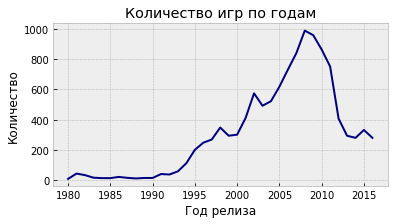

In [26]:
plt.style.use('bmh')

(
    games_per_year
        .plot(figsize=(6, 3), colormap='jet', legend=False, title='Количество игр по годам')
        .set(xlabel='Год релиза', ylabel='Количество')
)

plt.show()

Думаю, что для нас важны данные, когда игровая индустрия становится более конкурентной. когда появляются новые платформы и новые жанры. Видим три больших скачка - в конце 90-х, начале 00-х и в 2008 году, к 2012 году видим сильный спад, скорее всего это связано с массовым появлением смартфонов и мобильных игр, соответсвенно.

In [27]:
# Посмотрим, как менялись продажи по платформам.
def total_sales_per_platform_for(df):
    return (
        df
            .pivot_table(index='platform', values='sales', aggfunc='sum')
            .sort_values('sales', ascending=False)
    )

In [28]:
# Столбчатая диаграмма глобальных продаж
def bar_plot(df):
    (
        df
            .plot(kind='bar', y='sales', figsize=(10, 5), legend=False)
            .set(xlabel='Платформа', ylabel='Глобальные продажи')
    )
    plt.show()

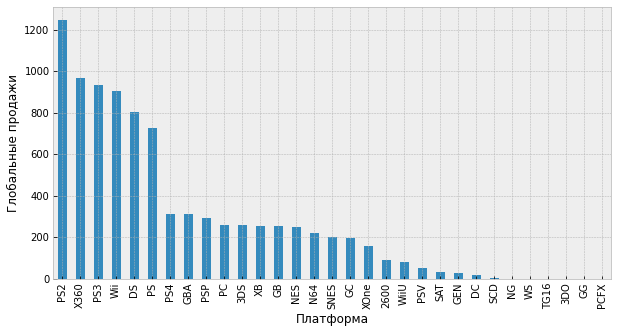

In [29]:
bar_plot(total_sales_per_platform_for(df))

In [30]:
# выберем платформы с наибольшими глобальными продажами, например, первые 5 из списка выше и построим распределение по годам.

top5_platform = total_sales_per_platform_for(df).head(5)
top5_platform

,sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28


In [31]:
#Глобальные продажи по платформе по годам
def yearly_total_sales_by_platform(name, df):
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

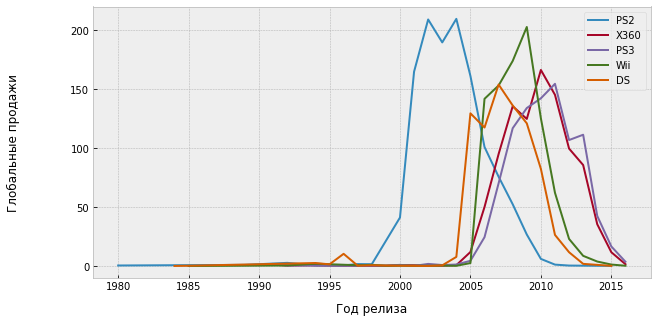

In [32]:
# Линейный график глобальных продаж по платформе по годам
for platform in list(top5_platform.index):
    yearly_total_sales_by_platform(platform, df)['sales'].plot(figsize=(10, 5), label=platform)
    plt.xlabel("Год релиза", labelpad=10)
    plt.ylabel("Глобальные продажи", labelpad=50)
    plt.legend()

In [33]:
# Возьмем данные за соответствующий актуальный период. Эти данные помогут построить прогноз на 2017 год.
actual_years = (df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)
actual_games = df.loc[actual_years]
actual_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
15561,Tsuki ni Yori Sou Otome no Sahou: Hidamari no ...,PSV,2015,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
13437,Ride 2,PS4,2016,Racing,0.00,0.04,0.00,0.01,71.0,8.0,E,0.05
3473,Rayman Legends,PS3,2014,Platform,0.14,0.34,0.00,0.10,91.0,8.7,E10+,0.58
5074,Persona 5,PS4,2016,Role-Playing,0.00,0.00,0.37,0.00,NaN,NaN,NaN,0.37
915,Batman: Arkham Origins,X360,2013,Action,1.15,0.56,0.00,0.17,74.0,7.5,T,1.88


In [34]:
actual_games.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False)

,sales
platform,
PS4,306.64
PS3,173.98
XOne,157.04
3DS,136.88
X360,134.24
WiiU,61.62
PC,40.11
PSV,30.49
Wii,13.71


In [35]:
top = actual_games.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False).head(6)
top

,sales
platform,
PS4,306.64
PS3,173.98
XOne,157.04
3DS,136.88
X360,134.24
WiiU,61.62


In [36]:
top.index

Index(['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU'], dtype='object', name='platform')

Примерно за 10 лет появляются новые и исчезают старые платформы. Таким образом, мы еще раз убедились, что данные за все периоды нам не понадобятся – достаточно определить актуальный период в 2-3 года и смотреть на игры на современных платформах.

In [37]:
# Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
total_sales = total_sales_per_platform_for(actual_games)

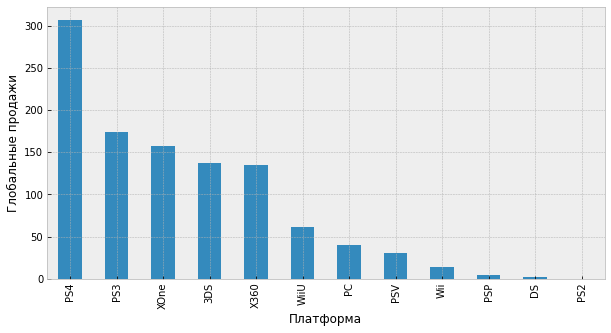

In [38]:
bar_plot(total_sales)

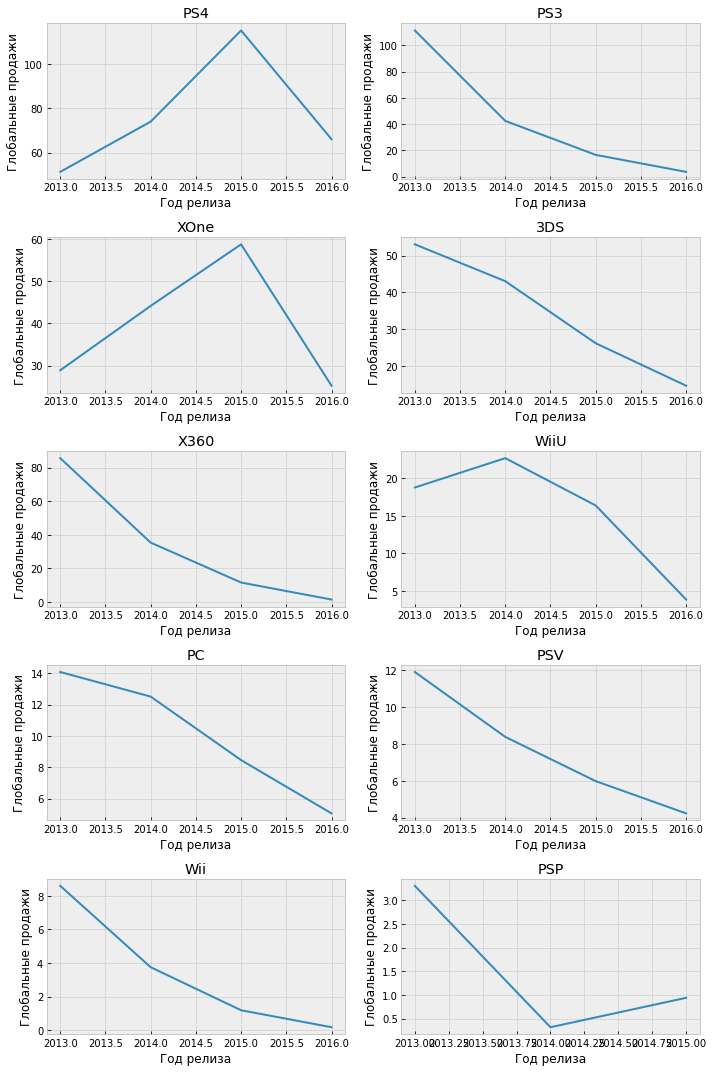

In [39]:
# список платформ за актуальный период
platforms = list(total_sales.index)

# график из 5 строк
rows = 5
cols = (len(platforms) // rows)
fig, ax = plt.subplots(rows, cols)

# построение графиков продаж по каждой платформе
num = 0
for row in range(rows):
    for col in range(cols):
        platform = platforms[num]
        (
            yearly_total_sales_by_platform(platform, actual_games)['sales']
                .plot(ax=ax[row, col], figsize=(10, 15), title=platform)
                .set(xlabel='Год релиза', ylabel='Глобальные продажи')
        )
        num += 1

plt.tight_layout()
plt.show()

за период 2013 - 2016 года, лидирующими платформами стали PS4, PS3 и XOne.

Среднее значение глобальных продаж игр для PS4: 76.66000000000001
Среднее значение глобальных продаж игр для PS3: 43.49500000000001
Среднее значение глобальных продаж игр для XOne: 39.260000000000005


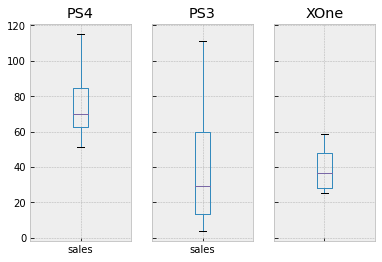

In [40]:
# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
promising_platforms = ['PS4', 'PS3', 'XOne']

fig, axs = plt.subplots(1, 3, sharey=True)

# построение графиков продаж по каждой платформе
for num, platform in enumerate(promising_platforms):
    df = yearly_total_sales_by_platform(platform, actual_games)
    print(f"Среднее значение глобальных продаж игр для {platform}: {df['sales'].mean()}")
    df.boxplot('sales', ax=axs[num])
    axs[num].set_title(platform)

plt.tick_params(labelcolor='none', bottom='off')
plt.subplots_adjust(left=0.1)
plt.show()

Text(0.5, 0, 'Год')

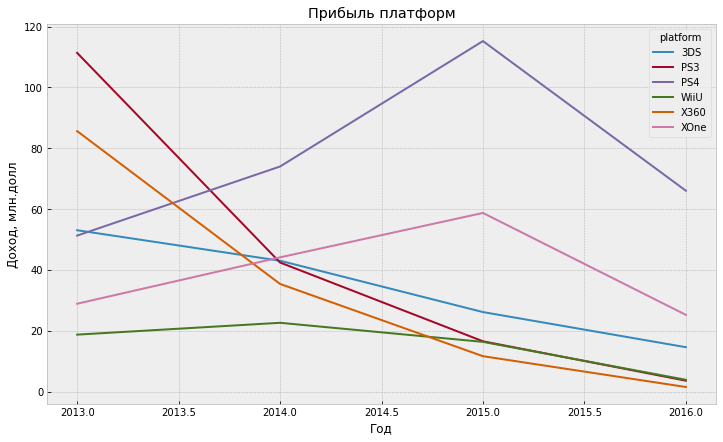

In [41]:
# построим график распределения прибыли по платформам
(actual_games.query('platform.isin(@top.index)')
 .pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum')
 .plot(by='platform', figsize = (12,7), grid=True))
plt.title('Прибыль платформ')
plt.ylabel('Доход, млн.долл')
plt.xlabel('Год')

In [42]:
actual_games.query('platform == "PS4" or platform == "PS3" or platform == "XOne" or platform == "WiiU"').groupby('platform')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS3,334.0,0.520898,1.470204,0.01,0.05,0.145,0.4575,21.05
PS4,373.0,0.822091,1.644046,0.01,0.06,0.200,0.7300,14.63
WiiU,106.0,0.581321,1.068900,0.01,0.06,0.230,0.6300,7.09
XOne,234.0,0.671111,1.057089,0.01,0.06,0.240,0.7375,7.39


Наличие большого числа выбросов и характерное смещение распределения вправо говорит о том, что на каждой из платформ выходили игры-блокбастеры, существенно превышающие по популярности и прибыльности большинство игр на этой же платформе - не платформа красит игру, а игра платформу. Для некоторых платформ выбросы - это возможное следствие малого числа наблюдений.

Несмотря на это, можно заметить, что есть более успешные по продажам платформы, такие как PS3, XOne, а также PS4 - медианное значение и верхняя граница 3 квантили наиболее высокие, но при этом широкий межквартильный размах говорит о сильной вариативности в продажах игр вокруг медианного значения. В то же время медианное значение WiiU приблизительно находится на уровне XOne, но при этом разброс сущетсвенно меньше. Игры, выпущенные под PC, проигрывают в продажах большинству консолей.

In [43]:
#Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
ps4 = actual_games.query("platform == 'PS4'")
ps3 = actual_games.query("platform == 'PS3'")
xone = actual_games.query("platform == 'XOne'")

In [44]:
# Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
features = ['user_score', 'critic_score', 'sales']
ps4[features].corr()

,user_score,critic_score,sales
user_score,1.000000,0.560715,-0.032188
critic_score,0.560715,1.000000,0.408963
sales,-0.032188,0.408963,1.000000


In [45]:
xone[features].corr()

,user_score,critic_score,sales
user_score,1.000000,0.472595,-0.063612
critic_score,0.472595,1.000000,0.415034
sales,-0.063612,0.415034,1.000000


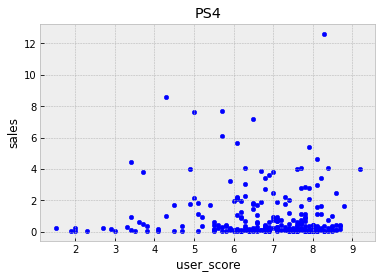

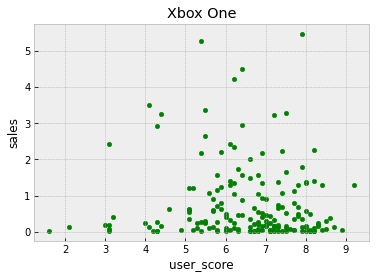

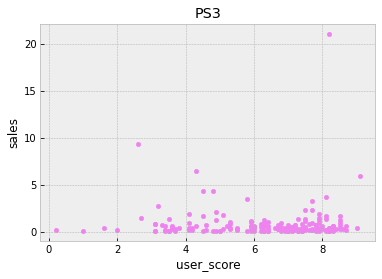

In [46]:
ps4.plot(x='user_score', y='sales', kind='scatter', title='PS4')
xone.plot(x='user_score', y='sales', kind='scatter', title='Xbox One', color='green')
ps3.plot(x='user_score', y='sales', kind='scatter', title='PS3', color = 'violet')
plt.show()

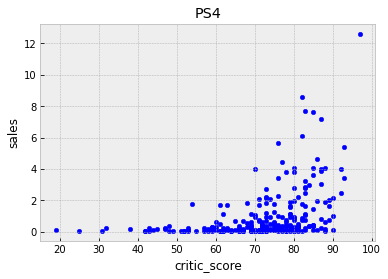

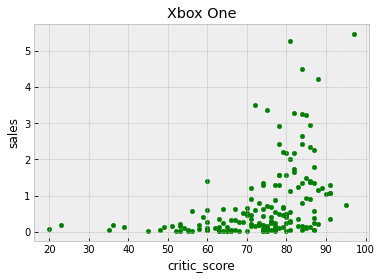

In [47]:
ps4.plot(x='critic_score', y='sales', kind='scatter', title='PS4')
xone.plot(x='critic_score', y='sales', kind='scatter', title='Xbox One', color='green')
plt.show()

Взаимосвязи между отзывами пользователей и продажами нет;

Взаимосвязь между отзывами критиков и продажами существует, однако не слишком большая;

Взаимосязь между отзывами критиков и отзывами пользователей существует, чуть большая чем между отзывами критиков и продажами.

Корреляция не говорит о причинно-следственной связи. И хотя по диаграммам рассеяния видим, что чем выше оценки критиков, тем выше продажи игр на обоих платформах, мы не можем утверждать, что высокие оценки критиками приводят к высоким продажам игр, а при покупке игры пользователи больше доверяют критикам, а не другим геймерам.

Text(0, 0.5, 'Глобальные продажи')

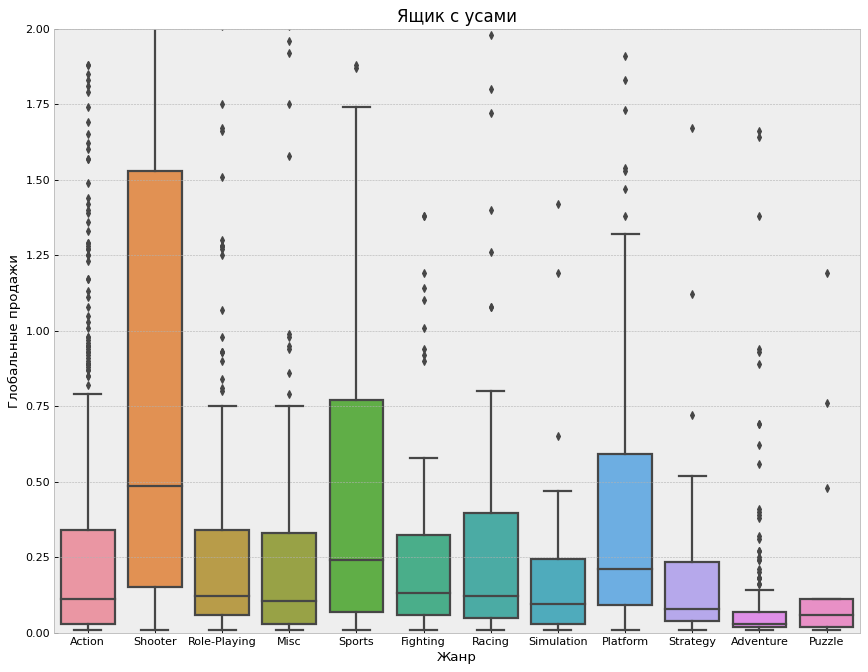

In [49]:
# распределение по жанрам
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='genre', y='sales', data=actual_games, notch=False)
plt.title('Ящик с усами', fontsize=15)
plt.ylim(0, 2)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

Самыми прибыльными жанрами являются Shooter, Sports, Platform (как по медианному значению, так и по межквартильному размаху). Наименее доходные жанры - Adventure и Puzzle.

### Вывод

Думаю, что для нас важны данные, когда игровая индустрия становится более конкурентной. когда появляются новые платформы и новые жанры. Видим три больших скачка - в конце 90-х, начале 00-х и в 2008 году, к 2012 году видим сильный спад, скорее всего это связано с массовым появлением смартфонов и мобильных игр, соответственно.

Примерно за 10 лет появляются новые и исчезают старые платформы. Таким образом, мы еще раз убедились, что данные за все периоды нам не понадобятся – достаточно определить актуальный период в 2-3 года и смотреть на игры на современных платформах.

Я взяла для анализа данные за 2013-2016 год включительно, за этот период лидирующими платформами стали PS4, PS3 и XOne.
Наличие большого числа выбросов и характерное смещение распределения вправо говорит о том, что на каждой из платформ выходили игры-блокбастеры, существенно превышающие по популярности и прибыльности большинство игр на этой же платформе - не платформа красит игру, а игра платформу. Для некоторых платформ выбросы - это возможное следствие малого числа наблюдений.

Несмотря на это, можно заметить, что есть более успешные по продажам платформы, такие как PS3, XOne, а также PS4 - медианное значение и верхняя граница 3 квантили наиболее высокие, но при этом широкий межквартильный размах говорит о сильной вариативности в продажах игр вокруг медианного значения. В то же время медианное значение WiiU приблизительно находится на уровне XOne, но при этом разброс сущетсвенно меньше. Игры, выпущенные под PC, проигрывают в продажах большинству консолей.

Взаимосвязи между отзывами пользователей и продажами нет;

Взаимосвязь между отзывами критиков и продажами существует, однако не слишком большая;

Взаимосязь между отзывами критиков и отзывами пользователей существует, чуть большая чем между отзывами критиков и продажами.
Корреляция не говорит о причинно-следственной связи. И хотя по диаграммам рассеяния видим, что чем выше оценки критиков, тем выше продажи игр на обоих платформах, мы не можем утверждать, что высокие оценки критиками приводят к высоким продажам игр, а при покупке игры пользователи больше доверяют критикам, а не другим геймерам.

Самыми прибыльными жанрами являются Shooter, Sports, Platform (как по медианному значению, так и по межквартильному размаху). Наименее доходные жанры - Adventure и Puzzle.


## Шаг 

### Портрет пользователя каждого региона

In [50]:
# заменяем пропуски в рейтинге на 'no_rating', чтобы учесть игры без рейтинга
actual_games['rating'] = actual_games['rating'].fillna('no_rating')

In [51]:
actual_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1165
user_score          966
rating                0
sales                 0
dtype: int64

In [52]:
# Определим для пользователей Северной Америки самые популярные платформы и их доли продаж
na_platform = actual_games.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_platform['share_of_sales'] = na_platform['na_sales'] / na_platform['na_sales'].sum() * 100
na_platform.head()

,na_sales,share_of_sales
platform,,
PS4,106.23,24.898629
XOne,91.87,21.532872
X360,80.09,18.771827
PS3,60.68,14.222431
3DS,37.19,8.716747


<AxesSubplot:title={'center':'Популярные платформы в Северной Америке'}, ylabel='share_of_sales'>

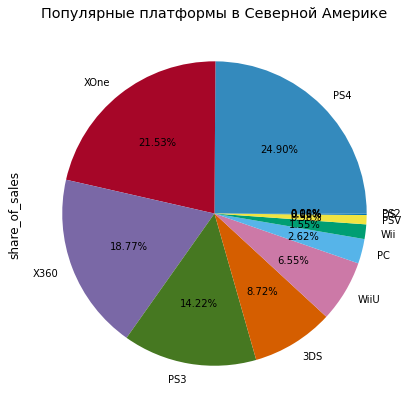

In [53]:
na_platform.plot(kind='pie', y='share_of_sales', autopct='%1.2f%%', figsize=(7,7), legend=None,
                 title='Популярные платформы в Северной Америке')

Популярными платформами в СА являются:

PS4 (24.89%)

XOne (21.53%)

X360 (18.77%)

PS3	(14.22%)

3DS	(8.71%)

Большая доля рынка выпадает на японские консоли - 39,11% - Сони( PS4 и PS3), и 15,27% - это Нинтендо (3DS и WiiU), доля американского производителя Майкрософт - 40,3% (XOne, X360)
Устаревшие платфомы такие как wii, ps2 и игры на PC совсем не популярны в СА

In [54]:
# Определим для пользователей Северной Америки самые популярные жанры и их доли продаж
na_genre = actual_games.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_genre['share_of_sales'] = na_genre['na_sales'] / na_genre['na_sales'].sum() * 100
na_genre.head()

,na_sales,share_of_sales
genre,,
Action,123.65,28.981601
Shooter,109.27,25.611157
Sports,65.27,15.298254
Role-Playing,39.78,9.323802
Misc,27.32,6.403375


Самые любимые жанры у игроманов Северной Америки - жанры Action и Shooter. На них приходится почти половина продаваемых игр (54,59% продаж). Тройка остальных популярных жанров Sports, Misc и RPG занимает 31,01% продаж


In [55]:
# Посмотрим, как влияет рейтинг ESRB на продажи в Северной Америке
na_rating = actual_games.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_rating['share_of_sales'] = na_rating['na_sales'] / na_rating['na_sales'].sum() * 100
na_rating

,na_sales,share_of_sales
rating,,
M,162.15,38.005391
no_rating,81.79,19.170280
E,78.89,18.490566
E10+,54.23,12.710653
T,49.59,11.623110


Самые частые игроки в СА - взрослые, рейтинг М уверенно стоит на 1 месте(38%) с большим отрывом от доли игр "без рейтинга"(19,11%). Игры "для всех" уверенно на 3 месте, среди тинэйджеров игры не очень популярны, а для совсем малышей практически никто не играет.

In [56]:
# Определим для пользователей Европы самые популярные платформы и их доли продаж
eu_platform = actual_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_platform['share_of_sales'] = eu_platform['eu_sales'] / eu_platform['eu_sales'].sum() * 100
eu_platform.head()

,eu_sales,share_of_sales
platform,,
PS4,137.79,35.946468
PS3,65.57,17.105812
XOne,50.77,13.244809
X360,41.76,10.894292
3DS,29.98,7.821142


<AxesSubplot:title={'center':'Популярные платформы в Европе'}, ylabel='share_of_sales'>

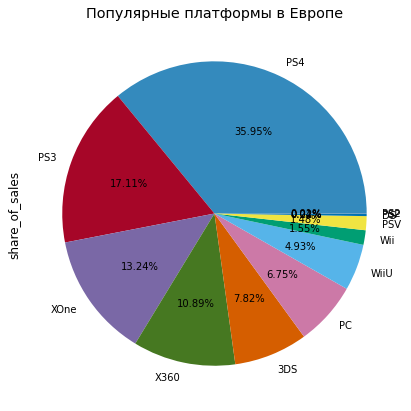

In [57]:
eu_platform.plot(kind='pie', y='share_of_sales', autopct='%1.2f%%', figsize=(7,7), legend=None,
                 title='Популярные платформы в Европе')

Популярные платформы в Европе:

PS4	(35.94%)

PS3	(17.10%)

XOne (13.24%)

X360 (10.89%)

3DS	(7.82)

Рынок в Европе захватил япоский Сони - 53% (PS4,PS3), американский Майкрософт всего лиш 24,13% (Xone,X360), японский Нинтендо - 12,75%(3DS, WiiU). В европе проявляется небольшая доля любителей игр на РС(6,75%)

In [58]:
# Определим для пользователей Европы самые популярные жанры и их доли продаж
eu_genre = actual_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_genre['share_of_sales'] = eu_genre['eu_sales'] / eu_genre['eu_sales'].sum() * 100
eu_genre.head()

,eu_sales,share_of_sales
genre,,
Action,116.17,30.306272
Shooter,87.63,22.860795
Sports,60.52,15.788375
Role-Playing,31.83,8.303767
Racing,20.06,5.233226


Предпочтения в игровых жанрах у европейцев полностью совпадают с предпочтениями американцев и канадцев. Самые любимые жанры у игроков Европы, как и у игроков Северной Америки - жанры Action и Shooter. На них приходится почти половина продаваемых игр (53,26% продаж). Тройка остальных популярных жанров Sports, Misc и RPG занимает 29,31% продаж

In [59]:
# Посмотрим, как влияет рейтинг ESRB на продажи в Европе
eu_rating = actual_games.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_rating['share_of_sales'] = eu_rating['eu_sales'] / eu_rating['eu_sales'].sum() * 100
eu_rating

,eu_sales,share_of_sales
rating,,
M,142.84,37.263905
E,83.14,21.689450
no_rating,72.75,18.978921
E10+,42.65,11.126474
T,41.94,10.941250


Игры для взрослых лидируют, как и у северных американцев, и составляет 37,26%, Игры без рейтинга составляют примерно такую же долю(18,79%), Игры для всех и всех 10+ суммарно составляют 32,7%

Среди тинейджеров игры менее популярны, а игр для раннего возраста вообще практически отсутсвуют

In [60]:
# Определим для пользователей Японии самые популярные платформы и их доли продаж
jp_platform = actual_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_platform['share_of_sales'] = jp_platform['jp_sales'] / jp_platform['jp_sales'].sum() * 100
jp_platform.head()

,jp_sales,share_of_sales
platform,,
3DS,63.61,47.300714
PS3,21.98,16.344438
PSV,17.73,13.184117
PS4,15.40,11.451517
WiiU,10.28,7.644259


<AxesSubplot:title={'center':'Популярные платформы в Японии'}, ylabel='share_of_sales'>

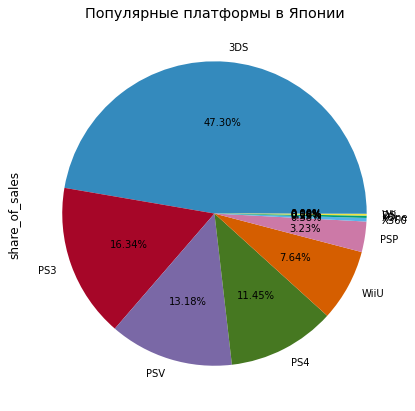

In [61]:
jp_platform.plot(kind='pie', y='share_of_sales', autopct='%1.2f%%', figsize=(7,7), legend=None,
                 title='Популярные платформы в Японии')

В Японии популярны исключительно японские производители!

3DS	47.30%

PS3	16.34%

PSV 13.18%

PS4	11.45%

WiiU 7.64%

Самая популярная платформа в Японии - это Нинтендовский 3DS(47,3%) занимает почти половину рынка, в то время когда 3 платформы Сони занимают всего 41%(PS3, PS4 и PSV) Устаревшие платформы не популярны так же как и игры на РС.

In [62]:
# Определим для пользователей Японии самые популярные жанры и их доли продаж
jp_genre = actual_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_genre['share_of_sales'] = jp_genre['jp_sales'] / jp_genre['jp_sales'].sum() * 100
jp_genre.head()

,jp_sales,share_of_sales
genre,,
Role-Playing,46.22,34.369423
Action,39.73,29.543427
Misc,9.66,7.183224
Fighting,7.41,5.510113
Shooter,6.60,4.907793


Предпочтения в игровых жанрах у японцев сильно отличаются от вкусов европейцев и северо-американцев. С большим отрывом лидируют жанры RP (34% продаж) и Action (29% продаж). В топ прибыльных жанров вошли так же Misc, Sport и Adventure. На их тройку приходится 17,5% продаж

In [63]:
# Посмотрим, как влияет рейтинг ESRB на продажи в Японии
jp_rating = actual_games.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_rating['share_of_sales'] = jp_rating['jp_sales'] / jp_rating['jp_sales'].sum() * 100
jp_rating

,jp_sales,share_of_sales
rating,,
no_rating,80.15,59.599941
T,19.79,14.715943
E,15.12,11.243308
M,13.53,10.060976
E10+,5.89,4.379833


Самыми популярными оказались игры "без рейтинга", почти 60%. Далее по популярности стали игры для тинейджеров, почти 15%, Игры для взрослых и 10+ оказались менее популярными чем в других частях мира.

### Вывод

.  СЕВЕРНАЯ АМЕРИКА
Популярными платформами в СА являются:

PS4 (24.89%)

XOne (21.53%)

X360 (18.77%)

PS3	(14.22%)

3DS	(8.71%)

Большая доля рынка выпадает на японские консоли - 39,11% - Сони( PS4 и PS3), и 15,27% - это Нинтендо (3DS и WiiU), доля американского производителя Майкрософт - 40,3% (XOne, X360)
Устаревшие платформы такие как wii, ps2 и игры на PC совсем не популярны в СА

Самые любимые жанры у игроманов Северной Америки - жанры Action и Shooter. На них приходится почти половина продаваемых игр (54,59% продаж). Тройка остальных популярных жанров Sports, Misc и RPG занимает 31,01% продаж

Самые частые игроки в СА - взрослые, рейтинг М уверенно стоит на 1 месте(38%) с большим отрывом от доли игр "без рейтинга"(19,11%). Игры "для всех" уверенно на 3 месте, среди тинэйджеров игры не очень популярны, а для совсем малышей практически никто не играет.
ЕВРОПА
Популярные платформы в Европе:

PS4	(35.94%)

PS3	(17.10%)

XOne (13.24%)

X360 (10.89%)

3DS	(7.82)

Рынок в Европе захватил япоский Сони - 53% (PS4,PS3), американский Майкрософт всего лиш 24,13% (Xone,X360), японский Нинтендо - 12,75%(3DS, WiiU). В европе проявляется небольшая доля любителей игр на РС(6,75%)

Предпочтения в игровых жанрах у европейцев полностью совпадают с предпочтениями американцев и канадцев. Самые любимые жанры у игроков Европы, как и у игроков Северной Америки - жанры Action и Shooter. На них приходится почти половина продаваемых игр (53,26% продаж). Тройка остальных популярных жанров Sports, Misc и RPG занимает 29,31% продаж

Игры для взрослых лидируют, как и у северных американцев, и составляет 37,26%, Игры без рейтинга составляют примерно такую же долю(18,79%), Игры для всех и всех 10+ суммарно составляют 32,7%

Среди тинейджеров игры менее популярны, а игр для раннего возраста вообще практически отсутствуют
ЯПОНИЯ
В Японии популярны исключительно японские производители!

3DS	47.30%

PS3	16.34%

PSV 13.18%

PS4	11.45%

WiiU 7.64%

Самая популярная платформа в Японии - это Нинтендовский 3DS(47,3%) занимает почти половину рынка, в то время когда 3 платформы Сони занимают всего 41%(PS3, PS4 и PSV) Устаревшие платформы не популярны так же как и игры на РС.

Предпочтения в игровых жанрах у японцев сильно отличаются от вкусов европейцев и северо-американцев. С большим отрывом лидируют жанры RP (34% продаж) и Action (29% продаж). В топ прибыльных жанров вошли так же Misc, Sport и Adventure. На их тройку приходится 17,5% продаж

Самыми популярными оказались игры "без рейтинга", почти 60%. Далее по популярности стали игры для тинейджеров, почти 15%, Игры для взрослых и 10+ оказались менее популярными чем в других частях мира.



## Шаг

### Проверяем гипотезы

In [64]:
# Проверим гипотезу, что средние пользовательские рейтинги платформ XOne и PC одинаковые
actual_games.query('platform == "XOne" or platform == "PC"').groupby('platform')['user_score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PC,157.0,6.28,1.74,1.4,5.3,6.8,7.6,9.3
XOne,180.0,6.51,1.38,1.6,5.8,6.8,7.5,9.2


Исходя из показателей медианы, среднего и стандартного отклонения пользовательских рейтингов платформ PC и XOne можно предположить, что средний пользовательский рейтинг платформы PC 6.28 не сильно отличается от среднего пользовательского рейтинга платформы XOne 6.51. Проверим это методами статистического анализа

In [65]:
alpha = .03

pc = actual_games.query("platform == 'PC'")

results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var=False,  # Welch’s t-test, который не предполагает равенство дисперсий
    nan_policy='omit' # игнорируем пропуски
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1760914302209405
Не получилось отвергнуть нулевую гипотезу


In [66]:
# проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
actual_games.query('genre == "Action" or genre == "Sports"').groupby('genre')['user_score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,383.0,6.83,1.34,2.0,6.3,7.1,7.8,9.1
Sports,160.0,5.24,1.78,0.2,4.1,5.5,6.5,8.8


Различие средних пользовательских оценок между жанрами Action и Sports более выражено: оценки игр в жанре Action на 6,3% выше.

Проверим гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные" (альтернативная гипотеза). Нулевая гипотеза: различий в оценках между жанрами нет.


In [67]:
alpha = .05


action = actual_games.query("genre == 'Action'")
sports = actual_games.query("genre == 'Sports'")

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    equal_var=False,  # Welch’s t-test, который не предполагает равенство дисперсий
    nan_policy='omit' # игнорируем пропуски
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.6574152294218424e-20
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги различаются, и практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится.

Гипотеза Средние пользовательские рейтинги жанров Action и Sports разные подтвердилась.

### Вывод
Исходя из показателей медианы, среднего и стандартного отклонения пользовательских рейтингов платформ PC и XOne можно предположить, что средний пользовательский рейтинг платформы PC 6.28 не сильно отличается от среднего пользовательского рейтинга платформы XOne 6.51. Проверим это методами статистического анализа

Гипотеза Средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердилась

Различие средних пользовательских оценок между жанрами Action и Sports более выражено: оценки игр в жанре Action на 6,3% выше.
Проверим гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные" (альтернативная гипотеза). Нулевая гипотеза: различий в оценках между жанрами нет.

Средние пользовательские рейтинги различаются, и практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится.

Гипотеза Средние пользовательские рейтинги жанров Action и Sports разные подтвердилась.



## Шаг

### Вывод

[1] Данные предоставлены с пропусками и без очевидных дубликатов, некоторые типы данных стоит изменить, и создать дополнительные колонки с категориями.

[2] В результате предварительной обработки данных названия столбцов приведены к единому регистру.

От пропусков в столбцах name и genre избавились, удалив две записи в таблице.

Избавились от пропусков в столбце year_of_release. Вначале заменили пропуски в дате выпуска игры на известную нам дату выпуска этой игры по другим записям. Оставшиеся пропуски удалили, так как они занимали примерно 2%

Столбец year_of_release приведен к целочисленному типу данных.

Проанализировали нулевые значения в столбцах по продажам игр в разных регионах: na_sales, eu_sales, jp_sales и other_sales.

Так как данные в таблице указаны в миллионах долларов, то значение менее 0.1 означает доход менее 100 000 долларов. Это большие суммы, но в таблице они могли быть учтены как нули. Поэтому нулевые показатели представляются реальными данными и никаких преобразований не требуют.

Проанализировали пропуски в столбцах с оценкой игр критиками, пользователями и рейтингом ESRB: critic_score, user_score, rating.

52% данных содержат пропуски в столбцах с оценкой критиками/пользователями или рейтингом. Поэтому удалять такой большой объем информации нельзя.

Заменить пропуски в оценке/рейтинге игры на ноль или медиану/среднее значение всего столбца тоже неправильно, так как показатель оценки/рейтинга является индивидуальной характеристикой игры и игровой платформы, на которой она используется, и не зависит от показателей оценки/рейтинга других игр. Поэтому пропуски в данных столбцах оставлены без изменений.

Аббревиатура 'tbd' в столбце user_score означает 'to be determined' и переводится как 'будет определено'. То есть на момент заполнения данных оценка игры пользователями отсутствовала, и значение 'tbd' приравнивается к пропуску в оценке. Значение 'tbd' было переведено в 'nan'.

Столбцам critic_score и user_score был присвоен вещественный тип данных.

Для каждой игры на отдельной платформе были посчитаны суммарные продажи во всех регионах.

[3] Думаю, что для нас важны данные, когда игровая индустрия становится более конкурентной. когда появляются новые платформы и новые жанры. Видим три больших скачка - в конце 90-х, начале 00-х и в 2008 году, к 2012 году видим сильный спад, скорее всего это связано с массовым появлением смартфонов и мобильных игр, соответственно.

Примерно за 10 лет появляются новые и исчезают старые платформы. Таким образом, мы еще раз убедились, что данные за все периоды нам не понадобятся – достаточно определить актуальный период в 2-3 года и смотреть на игры на современных платформах.

Я взяла для анализа данные за 2013-2016 год включительно, за этот период лидирующими платформами стали PS4, PS3 и XOne.

Наличие большого числа выбросов и характерное смещение распределения вправо говорит о том, что на каждой из платформ выходили игры-блокбастеры, существенно превышающие по популярности и прибыльности большинство игр на этой же платформе - не платформа красит игру, а игра платформу. Для некоторых платформ выбросы - это возможное следствие малого числа наблюдений.

Несмотря на это, можно заметить, что есть более успешные по продажам платформы, такие как PS3, XOne, а также PS4 - медианное значение и верхняя граница 3 квантили наиболее высокие, но при этом широкий межквартильный размах говорит о сильной вариативности в продажах игр вокруг медианного значения. В то же время медианное значение WiiU приблизительно находится на уровне XOne, но при этом разброс сущетсвенно меньше. Игры, выпущенные под PC, проигрывают в продажах большинству консолей.

Взаимосвязи между отзывами пользователей и продажами нет;

Взаимосвязь между отзывами критиков и продажами существует, однако не слишком большая;

Взаимосязь между отзывами критиков и отзывами пользователей существует, чуть большая чем между отзывами критиков и продажами.

Корреляция не говорит о причинно-следственной связи. И хотя по диаграммам рассеяния видим, что чем выше оценки критиков, тем выше продажи игр на обоих платформах, мы не можем утверждать, что высокие оценки критиками приводят к высоким продажам игр, а при покупке игры пользователи больше доверяют критикам, а не другим геймерам.

Самыми прибыльными жанрами являются Shooter, Sports, Platform (как по медианному значению, так и по межквартильному размаху). Наименее доходные жанры - Adventure и Puzzle.

[4] СЕВЕРНАЯ АМЕРИКА

Популярными платформами в СА являются:

PS4 (24.89%)

XOne (21.53%)

X360 (18.77%)

PS3	(14.22%)

3DS	(8.71%)

Большая доля рынка выпадает на японские консоли - 39,11% - Сони( PS4 и PS3), и 15,27% - это Нинтендо (3DS и WiiU), доля американского производителя Майкрософт - 40,3% (XOne, X360)
Устаревшие платформы такие как wii, ps2 и игры на PC совсем не популярны в СА

Самые любимые жанры у игроманов Северной Америки - жанры Action и Shooter. На них приходится почти половина продаваемых игр (54,59% продаж). Тройка остальных популярных жанров Sports, Misc и RPG занимает 31,01% продаж

Самые частые игроки в СА - взрослые, рейтинг М уверенно стоит на 1 месте(38%) с большим отрывом от доли игр "без рейтинга"(19,11%). Игры "для всех" уверенно на 3 месте, среди тинэйджеров игры не очень популярны, а для совсем малышей практически никто не играет.

ЕВРОПА

Популярные платформы в Европе:

PS4	(35.94%)

PS3	(17.10%)

XOne (13.24%)

X360 (10.89%)

3DS	(7.82)

Рынок в Европе захватил япоский Сони - 53% (PS4,PS3), американский Майкрософт всего лиш 24,13% (Xone,X360), японский Нинтендо - 12,75%(3DS, WiiU). В европе проявляется небольшая доля любителей игр на РС(6,75%)

Предпочтения в игровых жанрах у европейцев полностью совпадают с предпочтениями американцев и канадцев. Самые любимые жанры у игроков Европы, как и у игроков Северной Америки - жанры Action и Shooter. На них приходится почти половина продаваемых игр (53,26% продаж). Тройка остальных популярных жанров Sports, Misc и RPG занимает 29,31% продаж

Игры для взрослых лидируют, как и у северных американцев, и составляет 37,26%, Игры без рейтинга составляют примерно такую же долю(18,79%), Игры для всех и всех 10+ суммарно составляют 32,7%

Среди тинейджеров игры менее популярны, а игр для раннего возраста вообще практически отсутствуют

ЯПОНИЯ

В Японии популярны исключительно японские производители!

3DS	47.30%

PS3	16.34%

PSV 13.18%

PS4	11.45%

WiiU 7.64%

Самая популярная платформа в Японии - это Нинтендовский 3DS(47,3%) занимает почти половину рынка, в то время когда 3 платформы Сони занимают всего 41%(PS3, PS4 и PSV) Устаревшие платформы не популярны так же как и игры на РС.

Предпочтения в игровых жанрах у японцев сильно отличаются от вкусов европейцев и северо-американцев. С большим отрывом лидируют жанры RP (34% продаж) и Action (29% продаж). В топ прибыльных жанров вошли так же Misc, Sport и Adventure. На их тройку приходится 17,5% продаж

Самыми популярными оказались игры "без рейтинга", почти 60%. Далее по популярности стали игры для тинейджеров, почти 15%, Игры для взрослых и 10+ оказались менее популярными чем в других частях мира.


[5] Исходя из показателей медианы, среднего и стандартного отклонения пользовательских рейтингов платформ PC и XOne можно предположить, что средний пользовательский рейтинг платформы PC 6.28 не сильно отличается от среднего пользовательского рейтинга платформы XOne 6.51. Проверим это методами статистического анализа

Гипотеза Средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтвердилась

Различие средних пользовательских оценок между жанрами Action и Sports более выражено: оценки игр в жанре Action на 6,3% выше.

Проверим гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные" (альтернативная гипотеза). Нулевая гипотеза: различий в оценках между жанрами нет.
Средние пользовательские рейтинги различаются, и практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится.

Гипотеза Средние пользовательские рейтинги жанров Action и Sports разные подтвердилась.
